In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from tqdm import tqdm
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle
import tensorflow as tf
import math
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve


In [2]:
""" One v.s. All binary classification """

' One v.s. All binary classification '

In [3]:
df = pd.read_csv("../Data_Scrape/Dataset/updated_dataset.csv")

In [4]:
df.head()

sp_song_id  danceability  energy  key  loudness  mode  \
0  6edQfeOlqbGteYixpJl3Sm         0.857   0.602   10    -8.311     1   
1  5Oe7wHPL4hdEXeF4AOayCi         0.322   0.990    8    -1.785     1   
2  6i1uWZYWabNHq2wQnoca58         0.666   0.884    9    -5.243     0   
3  4BzBtS6PBreni5hNPo2hos         0.609   0.578    9    -7.081     1   
4  0GvhHQbWSnGltjl0je61dI         0.699   0.514    4   -12.610     1   

   speechiness  acousticness  instrumentalness  liveness  ...  lda_topic_11  \
0       0.0290      0.489000           0.02440    0.3170  ...           0.0   
1       0.1710      0.000044           0.41700    0.0366  ...           0.0   
2       0.0429      0.506000           0.00612    0.0408  ...           0.0   
3       0.0414      0.296000           0.00000    0.1500  ...           0.0   
4       0.0315      0.587000           0.02900    0.2200  ...           0.0   

   lda_topic_12  lda_topic_13  lda_topic_14  lda_topic_15  lda_topic_16  \
0      0.022993      0.000000      0.122078           0.0      0.000000   
1      0.000000      0.163142      0.022999           0.0      0.144614   
2      0.000000      0.000000      0.000000           0.0      0.000000   
3      0.000000      0.511716      0.084905           0.0      0.000000   
4      0.000000      0.000000      0.401954           0.0      0.000000   

   lda_topic_17  lda_topic_18  lda_topic_19  Playlists  
0      0.000000      0.081108      0.386042      [165]  
1      0.187207      0.000000      0.000000       [79]  
2      0.000000      0.000000      0.582131       [15]  
3      0.000000      0.115004      0.108140      [168]  
4      0.000000      0.000000      0.000000  [30, 133]  

[5 rows x 36 columns]

To generate non-overlapping playlists from the given list

In [5]:
playlists_multi = [132, 123,19,46,60,68,79,125]  #132, 123,19,46,60,68,79,125
# playlists_multi = [i for i in range(1,169,1)]  #132, 123,19,46,60,68,79,125

dict_playlists_to_songs = {}
data = np.array(df)
Dataset = []
for j in playlists_multi:
    l0 = []
    for i in df.index:
        l = eval(df["Playlists"][i])
        if(j in l):
            l.remove(j)
            flag = 0
            for k in playlists_multi:
                    if(k!=j and k in l):
                        flag = 1
            if(flag!=1):
                l0.append(df["sp_song_id"][i])
                Dataset.append(data[i])
                
    dict_playlists_to_songs[j] = l0
#     print(len(l0))
print(len(dict_playlists_to_songs))
Dataset = np.array(Dataset)
print(Dataset.shape)
np.random.shuffle(Dataset)
print(Dataset[0])



8
(2547, 36)
['0EYOdF5FCkgOJJla8DI2Md' 0.556 0.981 1 -2.688 0 0.128 0.00662 0.0 0.218
 0.716 101.42299999999999 255467 2005 75 0.1136651337146759
 0.13335412740707395 0.0 0.0 0.0 0.0 0.0 0.0 0.030962647870182988 0.0 0.0
 0.10412494838237762 0.0 0.0 0.0 0.0 0.28551968932151794
 0.11562371999025345 0.09813108295202257 0.11474650353193284
 '[40, 46, 67, 77, 84]']


In [6]:
X = Dataset[:,1:-1]
Y = Dataset[:,-1]
# print(Y)
for i in range(len(Y)):
    Y[i] = eval(Y[i])
    for j in playlists_multi:
        if(j in Y[i]):
            Y[i] = j
            break
    
print(X.shape)
print(Y.shape)



(2547, 34)
(2547,)


In [7]:
X = np.array(X)
y = np.array(Y)
y = Y.reshape(-1, 1)
standardScalar = StandardScaler()
X = standardScalar.fit_transform(X)
print(X.shape, y.shape)
y = np.squeeze(y)
# print(X)
# print(y)

(2547, 34) (2547, 1)


In [8]:
y = y.astype("str")
# print(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TSNE PLots

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)
print(tsne_em)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2037 samples in 0.016s...
[t-SNE] Computed neighbors for 2037 samples in 0.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2037
[t-SNE] Computed conditional probabilities for sample 2000 / 2037
[t-SNE] Computed conditional probabilities for sample 2037 / 2037
[t-SNE] Mean sigma: 1.750670
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.951363
[t-SNE] KL divergence after 1000 iterations: 1.816343
[[ 29.049982    -3.9251611 ]
 [ 24.07252     -0.63237256]
 [-44.09343      8.117212  ]
 ...
 [ 34.944416    -1.6291178 ]
 [ 12.277303   -11.581576  ]
 [ 22.768602    21.652424  ]]


In [12]:
df_tsne= pd.DataFrame(columns = ["x", "y", "label"] )
df_tsne["x"] = tsne_em[:,0]
df_tsne["y"] = tsne_em[:,1]
df_tsne["label"] = y_train

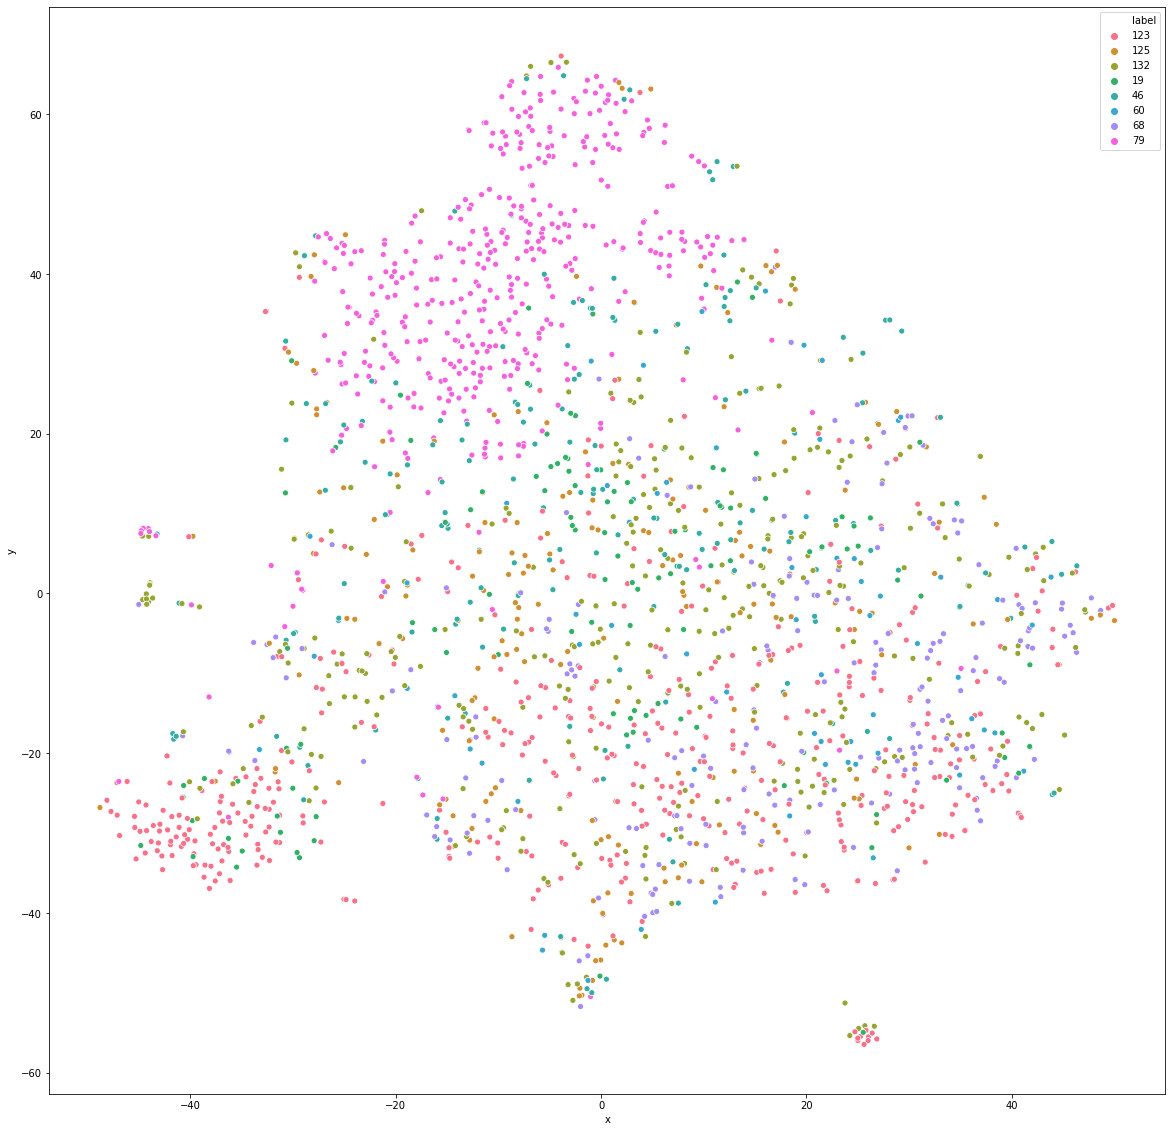

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,20))
# plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green", hue = y_train);
sns.scatterplot(x = df_tsne["x"], y = df_tsne["y"], hue = df_tsne["label"],  palette = sns.color_palette("husl", len(set(y_train))))
plt.show()

In [14]:

logistic = LogisticRegression(solver = "saga", multi_class = "multinomial")

logistic.fit(X_train, y_train)

test_score = logistic.score(X_test, y_test)

y_pred = logistic.predict(X_test)
pres_score = precision_score(y_test, y_pred, average = "weighted")

f1= f1_score(y_test, y_pred, average = "weighted")
recall_Score = recall_score(y_test, y_pred, average = "weighted")
print(test_score, pres_score, f1, recall_Score)

0.6058823529411764 0.5825595116018293 0.5929144700320406 0.6058823529411764


/home/pankil/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [15]:
""" One vs One Binary classification"""

' One vs One Binary classification'

In [16]:
df = pd.read_csv("../Data_Scrape/Dataset/updated_dataset.csv")

In [17]:
df.head()

sp_song_id  danceability  energy  key  loudness  mode  \
0  6edQfeOlqbGteYixpJl3Sm         0.857   0.602   10    -8.311     1   
1  5Oe7wHPL4hdEXeF4AOayCi         0.322   0.990    8    -1.785     1   
2  6i1uWZYWabNHq2wQnoca58         0.666   0.884    9    -5.243     0   
3  4BzBtS6PBreni5hNPo2hos         0.609   0.578    9    -7.081     1   
4  0GvhHQbWSnGltjl0je61dI         0.699   0.514    4   -12.610     1   

   speechiness  acousticness  instrumentalness  liveness  ...  lda_topic_11  \
0       0.0290      0.489000           0.02440    0.3170  ...           0.0   
1       0.1710      0.000044           0.41700    0.0366  ...           0.0   
2       0.0429      0.506000           0.00612    0.0408  ...           0.0   
3       0.0414      0.296000           0.00000    0.1500  ...           0.0   
4       0.0315      0.587000           0.02900    0.2200  ...           0.0   

   lda_topic_12  lda_topic_13  lda_topic_14  lda_topic_15  lda_topic_16  \
0      0.022993      0.000000      0.122078           0.0      0.000000   
1      0.000000      0.163142      0.022999           0.0      0.144614   
2      0.000000      0.000000      0.000000           0.0      0.000000   
3      0.000000      0.511716      0.084905           0.0      0.000000   
4      0.000000      0.000000      0.401954           0.0      0.000000   

   lda_topic_17  lda_topic_18  lda_topic_19  Playlists  
0      0.000000      0.081108      0.386042      [165]  
1      0.187207      0.000000      0.000000       [79]  
2      0.000000      0.000000      0.582131       [15]  
3      0.000000      0.115004      0.108140      [168]  
4      0.000000      0.000000      0.000000  [30, 133]  

[5 rows x 36 columns]

In [18]:
""" SVM - Linear Classification  """

' SVM - Linear Classification  '

In [5]:

def run_model(model_type = "LR", neighbours = 5):
    """
    Runs the model inputed and saves the corresponding pickle file
    
    Arguments
    ----------
    model_type : str, of the type [LR, SVM, ANN, DT, KNN, RF, XGB], default = LR
    
    Returns
    --------
    result_history 
    """
    playlists = []
    result_history = {}
    saved_models = []

    np.random.seed(123)

    for playlist in tqdm(range(0,169,1), desc = "Progress : ", position = 0, leave = True):
        X = []
        y = []
        list_of_is = []
        for i in df.index:
            a = list(df.iloc[i])[1:-1]
            if playlist in eval(df['Playlists'][i]):
                X.append(a)
                y.append(1)
            else:
                _ = np.random.randint(0, 26)
                if _ == 0:
                    X.append(a)
                    y.append(0)



        X = np.array(X)
        y = np.array(y)



        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify = y)

        standardScalar = StandardScaler()
        X_train = standardScalar.fit_transform(X_train)
        X_test = standardScalar.transform(X_test)
        
        
        if(model_type == "LR" ):
            model = LogisticRegression()
            
        elif(model_type == "SVM"):
            model = SVC(kernel = 'linear')
        
        elif (model_type == "DT"):
            model = DecisionTreeClassifier(criterion = 'entropy', max_depth =  20)
            
        elif (model_type == "RF"):
            model = RandomForestClassifier(criterion = 'entropy')
            
        
        elif(model_type == "XGB"):
            
            param = {
                "learning_rate" : 0.1,
                "n_estimators" : 500,
                "max_depth" : 20,
                "min_child_weight" : 1,
                "gamma" : 0.1,
                "subsample": 0.9,
                "colsample_bytree" : 0.9,
                "objective" : 'binary:logistic',
                "nthread" : 4,
                "scale_pos_weight" :  1,
                "seed" : 27
            }
            
            model = XGBClassifier(**param)
        
        elif(model_type == "KNN"):
            model = KNeighborsClassifier(n_neighbors=neighbours)
            
        elif(model_type == "ANN"):
            model = Sequential([Dense(units = 24, input_shape = (34, ), activation = 'relu'),
            Dense(units = 12, activation = 'relu'),
            Dense(units = 4, activation = 'relu'),       
            Dense(units = 1, activation = 'sigmoid')
            ])
            model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.05), loss = 'binary_crossentropy', metrics = ['accuracy'])
            model.summary()
            
        


#         xgb = XGBClassifier(**param)    
        
        if model_type != 'ANN':
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        else:
            model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 20)
            y_pred = model.predict_classes(X_test)
            

        pres_score = precision_score(y_test, y_pred, average = "macro")

        f1= f1_score(y_test, y_pred, average = "macro")
        recall_Score = recall_score(y_test, y_pred, average = "macro")

        result_history[playlist] = {"Precision Score " : pres_score, "Recall Score " : recall_Score, "F1 Score " : f1 }
        if(model_type != "ANN"):
            saved_models.append(model)
        else:
            model.save("saved_models_binary/" + "ANN/" + "ANN" + str(playlist) )
    
    if(model_type !="ANN"):
        f = open("saved_models_binary/" + model_type, "wb")
        pickle.dump(saved_models, f)
        f.close()
        
    print(result_history)
    return result_history

In [6]:
# f = open("binary_svc_linear_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [7]:
f = open("binary_svc_linear_result", "rb")
l = pickle.load(f)
f.close()

In [8]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [9]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

71  =  {'Precision Score ': 0.9615384615384616, 'Recall Score ': 0.9945652173913043, 'F1 Score ': 0.9772677595628416}
89  =  {'Precision Score ': 0.955977229601518, 'Recall Score ': 0.955977229601518, 'F1 Score ': 0.955977229601518}
137  =  {'Precision Score ': 0.9624482554701359, 'Recall Score ': 0.9443181818181818, 'F1 Score ': 0.953063885267275}
100  =  {'Precision Score ': 0.925, 'Recall Score ': 0.9836956521739131, 'F1 Score ': 0.9511721666417798}
99  =  {'Precision Score ': 0.929128277817151, 'Recall Score ': 0.929128277817151, 'F1 Score ': 0.929128277817151}
98  =  {'Precision Score ': 0.9108527131782946, 'Recall Score ': 0.9430512016718913, 'F1 Score ': 0.9261120884644383}
66  =  {'Precision Score ': 0.9211764705882353, 'Recall Score ': 0.9282296650717703, 'F1 Score ': 0.9245823860828308}
97  =  {'Precision Score ': 0.8999208860759493, 'Recall Score ': 0.9457671957671958, 'F1 Score ': 0.9208333333333333}
161  =  {'Precision Score ': 0.9332659251769464, 'Recall Score ': 0.908095

In [10]:
""" Logistic Regression Result"""

' Logistic Regression Result'

In [11]:
result_history = run_model(model_type = "LR")

Progress : 100%|█████████████████████████████████████████████████████████████████████| 169/169 [21:04<00:00,  7.48s/it]


{0: {'Precision Score ': 0.7339366515837105, 'Recall Score ': 0.7339366515837105, 'F1 Score ': 0.7339366515837105}, 1: {'Precision Score ': 0.8248847926267281, 'Recall Score ': 0.7905219780219781, 'F1 Score ': 0.806159420289855}, 2: {'Precision Score ': 0.6427083333333333, 'Recall Score ': 0.6003663003663003, 'F1 Score ': 0.6145454545454545}, 3: {'Precision Score ': 0.844017094017094, 'Recall Score ': 0.836038961038961, 'F1 Score ': 0.839882697947214}, 4: {'Precision Score ': 0.7527472527472527, 'Recall Score ': 0.6931524547803618, 'F1 Score ': 0.7156916347731002}, 5: {'Precision Score ': 0.8527443105756358, 'Recall Score ': 0.7565725413826679, 'F1 Score ': 0.7934904601571269}, 6: {'Precision Score ': 0.8052434456928839, 'Recall Score ': 0.755485893416928, 'F1 Score ': 0.7772727272727272}, 7: {'Precision Score ': 0.875, 'Recall Score ': 0.9772727272727273, 'F1 Score ': 0.9169435215946844}, 8: {'Precision Score ': 0.8111111111111111, 'Recall Score ': 0.8111111111111111, 'F1 Score ': 0.8

In [ ]:
# f = open("binary_linear_regression_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [12]:
f = open("binary_linear_regression_result", "rb")
l = pickle.load(f)
f.close()

In [13]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [14]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

101  =  {'Precision Score ': 0.9945652173913043, 'Recall Score ': 0.9545454545454546, 'F1 Score ': 0.9734582357533177}
137  =  {'Precision Score ': 0.9545454545454546, 'Recall Score ': 0.9887640449438202, 'F1 Score ': 0.9705086580086579}
71  =  {'Precision Score ': 0.9285714285714286, 'Recall Score ': 0.9891304347826086, 'F1 Score ': 0.956043956043956}
100  =  {'Precision Score ': 0.957997311827957, 'Recall Score ': 0.9357416879795396, 'F1 Score ': 0.9464373464373463}
86  =  {'Precision Score ': 0.9565548780487805, 'Recall Score ': 0.9350036310820624, 'F1 Score ': 0.9453430005577244}
89  =  {'Precision Score ': 0.9492248062015505, 'Recall Score ': 0.9398481973434535, 'F1 Score ': 0.9443965104016873}
72  =  {'Precision Score ': 0.9384036144578314, 'Recall Score ': 0.9329268292682926, 'F1 Score ': 0.9355780022446689}
82  =  {'Precision Score ': 0.9221891288160834, 'Recall Score ': 0.9295454545454545, 'F1 Score ': 0.9257486154134985}
97  =  {'Precision Score ': 0.9054355919583024, 'Recall

In [15]:
""" Decision Tree Result"""

' Decision Tree Result'

In [16]:
result_history = run_model(model_type = "DT")

Progress : 100%|█████████████████████████████████████████████████████████████████████| 169/169 [12:08<00:00,  4.31s/it]


{0: {'Precision Score ': 0.8551810237203495, 'Recall Score ': 0.7574660633484163, 'F1 Score ': 0.7951933124346917}, 1: {'Precision Score ': 0.7569444444444444, 'Recall Score ': 0.6397664835164836, 'F1 Score ': 0.6714912280701754}, 2: {'Precision Score ': 0.648989898989899, 'Recall Score ': 0.672893772893773, 'F1 Score ': 0.659048586422888}, 3: {'Precision Score ': 0.7740461049284579, 'Recall Score ': 0.8198051948051948, 'F1 Score ': 0.7883289124668434}, 4: {'Precision Score ': 0.6931818181818181, 'Recall Score ': 0.6757105943152455, 'F1 Score ': 0.6835699797160244}, 5: {'Precision Score ': 0.7575075075075075, 'Recall Score ': 0.8339824732229796, 'F1 Score ': 0.7866329327429896}, 6: {'Precision Score ': 0.7457013574660634, 'Recall Score ': 0.7836990595611285, 'F1 Score ': 0.7625968992248062}, 7: {'Precision Score ': 0.7633928571428572, 'Recall Score ': 0.8352272727272727, 'F1 Score ': 0.7923588039867109}, 8: {'Precision Score ': 0.9229390681003584, 'Recall Score ': 0.8277777777777777, '

In [ ]:
# f = open("binary_decision_tree_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [17]:
f = open("binary_decision_tree_result", "rb")
l = pickle.load(f)
f.close()

In [18]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [19]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

100  =  {'Precision Score ': 0.938949938949939, 'Recall Score ': 0.9597186700767264, 'F1 Score ': 0.9489461358313818}
97  =  {'Precision Score ': 0.949343339587242, 'Recall Score ': 0.9223985890652557, 'F1 Score ': 0.9352419904567144}
71  =  {'Precision Score ': 0.9437927663734116, 'Recall Score ': 0.911231884057971, 'F1 Score ': 0.9266745005875441}
101  =  {'Precision Score ': 0.9110486891385767, 'Recall Score ': 0.9434343434343434, 'F1 Score ': 0.9264027204274958}
92  =  {'Precision Score ': 0.8941860465116279, 'Recall Score ': 0.9484126984126984, 'F1 Score ': 0.9177371541501975}
106  =  {'Precision Score ': 0.9062229904926534, 'Recall Score ': 0.9177777777777778, 'F1 Score ': 0.9118194763939096}
45  =  {'Precision Score ': 0.901707779886148, 'Recall Score ': 0.9195402298850575, 'F1 Score ': 0.9100775193798449}
89  =  {'Precision Score ': 0.9292550977944236, 'Recall Score ': 0.8914611005692599, 'F1 Score ': 0.9080459770114943}
73  =  {'Precision Score ': 0.9371035940803383, 'Recall S

In [20]:
""" Random Forest Result"""

' Random Forest Result'

In [21]:
result_history = run_model(model_type = "RF")

Progress :  20%|█████████████▋                                                        | 33/169 [02:46<10:55,  4.82s/it]C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Progress :  23%|████████████████▏                                                     | 39/169 [03:15<10:09,  4.69s/it]C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Progress :  70%|████████████████████████████████████████████████▌                    | 119/169 [09:37<03:36,  4.33s/it]C:\Users\Asus\Anaconda3\lib\site-packages

{0: {'Precision Score ': 0.9521276595744681, 'Recall Score ': 0.6538461538461539, 'F1 Score ': 0.7101544528425896}, 1: {'Precision Score ': 0.9423076923076923, 'Recall Score ': 0.625, 'F1 Score ': 0.6693877551020408}, 2: {'Precision Score ': 0.9368932038834952, 'Recall Score ': 0.5666666666666667, 'F1 Score ': 0.5839683023468454}, 3: {'Precision Score ': 0.8964285714285715, 'Recall Score ': 0.8203463203463204, 'F1 Score ': 0.8488172327210255}, 4: {'Precision Score ': 0.8918128654970761, 'Recall Score ': 0.7164082687338501, 'F1 Score ': 0.7659095559648046}, 5: {'Precision Score ': 0.9602272727272727, 'Recall Score ': 0.7307692307692308, 'F1 Score ': 0.7950794145126129}, 6: {'Precision Score ': 0.9728260869565217, 'Recall Score ': 0.7727272727272727, 'F1 Score ': 0.8389746960236608}, 7: {'Precision Score ': 0.9527153558052435, 'Recall Score ': 0.9527153558052435, 'F1 Score ': 0.9527153558052435}, 8: {'Precision Score ': 0.781786941580756, 'Recall Score ': 0.5776515151515151, 'F1 Score ':

In [ ]:
# f = open("binary_random_forest_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [22]:
f = open("binary_random_forest_result", "rb")
l = pickle.load(f)
f.close()

In [23]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [24]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

89  =  {'Precision Score ': 0.9886363636363636, 'Recall Score ': 0.967741935483871, 'F1 Score ': 0.9775862068965517}
100  =  {'Precision Score ': 0.9473684210526316, 'Recall Score ': 0.9893617021276595, 'F1 Score ': 0.9668458781362007}
7  =  {'Precision Score ': 0.9527153558052435, 'Recall Score ': 0.9527153558052435, 'F1 Score ': 0.9527153558052435}
72  =  {'Precision Score ': 0.9403304773561811, 'Recall Score ': 0.9499687304565353, 'F1 Score ': 0.9448051948051949}
97  =  {'Precision Score ': 0.9314024390243902, 'Recall Score ': 0.9546184738955823, 'F1 Score ': 0.9425219941348973}
45  =  {'Precision Score ': 0.92357910906298, 'Recall Score ': 0.942261427425822, 'F1 Score ': 0.9323529411764706}
71  =  {'Precision Score ': 0.9173951048951049, 'Recall Score ': 0.9470973782771535, 'F1 Score ': 0.9315254237288135}
102  =  {'Precision Score ': 0.9104166666666667, 'Recall Score ': 0.9504573170731707, 'F1 Score ': 0.9288307915758895}
103  =  {'Precision Score ': 0.9002976190476191, 'Recall Sc

In [25]:
""" XG Boost Result"""

' XG Boost Result'

In [26]:
result_history = run_model(model_type = "XGB")

Progress : 100%|█████████████████████████████████████████████████████████████████████| 169/169 [12:42<00:00,  4.51s/it]


{0: {'Precision Score ': 0.9775280898876404, 'Recall Score ': 0.8461538461538461, 'F1 Score ': 0.8975966562173459}, 1: {'Precision Score ': 0.8587628865979382, 'Recall Score ': 0.739010989010989, 'F1 Score ': 0.7810965630114566}, 2: {'Precision Score ': 0.7301587301587301, 'Recall Score ': 0.6168498168498169, 'F1 Score ': 0.6449760765550239}, 3: {'Precision Score ': 0.8500000000000001, 'Recall Score ': 0.8652597402597402, 'F1 Score ': 0.8570780399274047}, 4: {'Precision Score ': 0.8273408239700375, 'Recall Score ': 0.7822997416020672, 'F1 Score ': 0.8019047619047619}, 5: {'Precision Score ': 0.9017857142857143, 'Recall Score ': 0.7629016553067186, 'F1 Score ': 0.8118609406952966}, 6: {'Precision Score ': 0.8511904761904763, 'Recall Score ': 0.9315569487983281, 'F1 Score ': 0.8853801169590643}, 7: {'Precision Score ': 0.9173297966401415, 'Recall Score ': 0.946969696969697, 'F1 Score ': 0.9314285714285713}, 8: {'Precision Score ': 0.8926073926073926, 'Recall Score ': 0.8638888888888889, 

In [ ]:
# f = open("binary_xgb_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [27]:
f = open("binary_xgb_result", "rb")
l = pickle.load(f)
f.close()

In [28]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [29]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

97  =  {'Precision Score ': 0.96875, 'Recall Score ': 0.9938271604938271, 'F1 Score ': 0.9807653776798237}
71  =  {'Precision Score ': 0.9946236559139785, 'Recall Score ': 0.9583333333333333, 'F1 Score ': 0.9755581668625147}
100  =  {'Precision Score ': 0.9893617021276595, 'Recall Score ': 0.9411764705882353, 'F1 Score ': 0.9633736559139785}
137  =  {'Precision Score ': 0.9347826086956521, 'Recall Score ': 0.9831460674157304, 'F1 Score ': 0.9565448504983388}
72  =  {'Precision Score ': 0.9409883720930232, 'Recall Score ': 0.9512195121951219, 'F1 Score ': 0.9457671957671958}
102  =  {'Precision Score ': 0.9555555555555555, 'Recall Score ': 0.9318820224719101, 'F1 Score ': 0.94323301495765}
89  =  {'Precision Score ': 0.9594155844155845, 'Recall Score ': 0.9296015180265655, 'F1 Score ': 0.9431762515920447}
85  =  {'Precision Score ': 0.936633912824389, 'Recall Score ': 0.9484989648033126, 'F1 Score ': 0.9419457735247209}
74  =  {'Precision Score ': 0.9360047846889952, 'Recall Score ': 0.

KNN Classification

In [30]:
n_neighbours = 13

In [31]:
result_history = run_model(model_type = "KNN", neighbours = n_neighbours)

Progress :   9%|██████▏                                                               | 15/169 [01:02<10:17,  4.01s/it]C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Progress :  14%|█████████▌                                                            | 23/169 [01:35<10:17,  4.23s/it]C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Progress :  20%|█████████████▋                                                        | 33/169 [02:19<10:04,  4.44s/it]C:\Users\Asus\Anaconda3\lib\site-packages

{0: {'Precision Score ': 0.9427083333333333, 'Recall Score ': 0.5769230769230769, 'F1 Score ': 0.6029465930018416}, 1: {'Precision Score ': 0.9375, 'Recall Score ': 0.59375, 'F1 Score ': 0.6245614035087719}, 2: {'Precision Score ': 0.42788461538461536, 'Recall Score ': 0.489010989010989, 'F1 Score ': 0.4564102564102564}, 3: {'Precision Score ': 0.7676470588235293, 'Recall Score ': 0.711038961038961, 'F1 Score ': 0.7299382716049383}, 4: {'Precision Score ': 0.7714285714285715, 'Recall Score ': 0.7209302325581395, 'F1 Score ': 0.7414772727272728}, 5: {'Precision Score ': 0.9388888888888889, 'Recall Score ': 0.5769230769230769, 'F1 Score ': 0.6007889546351085}, 6: {'Precision Score ': 0.9484536082474226, 'Recall Score ': 0.5454545454545454, 'F1 Score ': 0.5561594202898551}, 7: {'Precision Score ': 0.7632575757575758, 'Recall Score ': 0.7632575757575758, 'F1 Score ': 0.7632575757575758}, 8: {'Precision Score ': 0.95, 'Recall Score ': 0.5833333333333334, 'F1 Score ': 0.6165413533834587}, 9:

In [32]:
f = open("binary_KNN_"+str(n_neighbours)+"_result", "wb")
pickle.dump(result_history, f)
f.close()

In [33]:
f = open("binary_KNN_"+str(n_neighbours)+"_result", "rb")
l = pickle.load(f)
f.close()

In [34]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [35]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

101  =  {'Precision Score ': 0.9583333333333333, 'Recall Score ': 0.9945054945054945, 'F1 Score ': 0.9754984386259908}
100  =  {'Precision Score ': 0.925, 'Recall Score ': 0.9836956521739131, 'F1 Score ': 0.9511721666417798}
72  =  {'Precision Score ': 0.9451219512195121, 'Recall Score ': 0.9451219512195121, 'F1 Score ': 0.9451219512195121}
97  =  {'Precision Score ': 0.9166666666666667, 'Recall Score ': 0.9814814814814814, 'F1 Score ': 0.9451114922813035}
137  =  {'Precision Score ': 0.9166666666666667, 'Recall Score ': 0.9775280898876404, 'F1 Score ': 0.9430512016718913}
89  =  {'Precision Score ': 0.9223985890652557, 'Recall Score ': 0.9544592030360531, 'F1 Score ': 0.936473165388828}
99  =  {'Precision Score ': 0.8936708860759495, 'Recall Score ': 0.9461979913916786, 'F1 Score ': 0.9169044821218735}
102  =  {'Precision Score ': 0.8889228886168911, 'Recall Score ': 0.9462780898876404, 'F1 Score ': 0.9142857142857144}
45  =  {'Precision Score ': 0.8938271604938272, 'Recall Score ': 0

In [ ]:
f1_list = []
for key in list(l.keys()):
    f1_list.append(l[key]['F1 Score '])
print(f1_list)

In [ ]:
print(sum(f1_list)/len(f1_list))

ANN Classification (Deep Learning)

In [36]:
result_history = run_model(model_type = "ANN")

Progress :   0%|                                                                               | 0/169 [00:00<?, ?it/s]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7974 - accuracy: 0.21 - 0s 47ms/step - loss: 0.6584 - accuracy: 0.7340 - val_loss: 0.4655 - val_accuracy: 0.8673
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.497

Progress :   1%|▍                                                                      | 1/169 [00:13<38:53, 13.89s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                840       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 52        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 0s 26ms/step - loss: 0.6374 - accuracy: 0.6729 - val_loss: 0.3437 - val_accuracy: 0.8505
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.3938 - accuracy: 0.81 - 0s 7ms/step - loss:

Progress :   1%|▊                                                                      | 2/169 [00:21<33:31, 12.05s/it]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 24)                840       
_________________________________________________________________
dense_9 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7863 - accuracy: 0.51 - 0s 28ms/step - loss: 0.5642 - accuracy: 0.7991 - val_loss: 0.3849 - val_accuracy: 0.8585
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.3

Progress :   2%|█▎                                                                     | 3/169 [00:29<29:35, 10.69s/it]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_13 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.62 - 0s 34ms/step - loss: 0.5452 - accuracy: 0.7194 - val_loss: 0.4861 - val_accuracy: 0.7333
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.4

Progress :   2%|█▋                                                                     | 4/169 [00:37<27:26,  9.98s/it]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_17 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6414 - accuracy: 0.59 - 0s 27ms/step - loss: 0.3924 - accuracy: 0.7928 - val_loss: 0.3094 - val_accuracy: 0.8269
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.2

Progress :   3%|██                                                                     | 5/169 [00:44<24:40,  9.03s/it]

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_21 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.6773 - accuracy: 0.68 - 0s 25ms/step - loss: 0.4463 - accuracy: 0.8342 - val_loss: 0.3000 - val_accuracy: 0.8587
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.3

Progress :   4%|██▌                                                                    | 6/169 [00:50<22:27,  8.26s/it]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_25 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7418 - accuracy: 0.54 - 0s 22ms/step - loss: 0.4225 - accuracy: 0.8303 - val_loss: 0.2293 - val_accuracy: 0.8878
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.1

Progress :   4%|██▉                                                                    | 7/169 [00:57<20:58,  7.77s/it]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_29 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8919 - accuracy: 0.31 - 0s 21ms/step - loss: 0.4480 - accuracy: 0.7820 - val_loss: 0.1958 - val_accuracy: 0.8800
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.2

Progress :   5%|███▎                                                                   | 8/169 [01:04<19:55,  7.43s/it]

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_33 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.4070 - accuracy: 0.89 - 0s 22ms/step - loss: 0.3121 - accuracy: 0.8837 - val_loss: 0.3119 - val_accuracy: 0.8824
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.1

Progress :   5%|███▊                                                                   | 9/169 [01:10<19:12,  7.20s/it]

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_37 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8505 - accuracy: 0.23 - 0s 23ms/step - loss: 0.6811 - accuracy: 0.6979 - val_loss: 0.6181 - val_accuracy: 0.7636
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.6

Progress :   6%|████▏                                                                 | 10/169 [01:17<18:28,  6.97s/it]

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_41 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.9017 - accuracy: 0.35 - 0s 24ms/step - loss: 0.5012 - accuracy: 0.7587 - val_loss: 0.2901 - val_accuracy: 0.8511
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.

Progress :   7%|████▌                                                                 | 11/169 [01:23<17:51,  6.78s/it]

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_45 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.51 - 0s 33ms/step - loss: 0.4526 - accuracy: 0.7452 - val_loss: 0.2633 - val_accuracy: 0.8476
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :   7%|████▉                                                                 | 12/169 [01:31<18:46,  7.18s/it]

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_49 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.5504 - accuracy: 0.81 - 0s 19ms/step - loss: 0.3860 - accuracy: 0.8243 - val_loss: 0.2839 - val_accuracy: 0.8362
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :   8%|█████▍                                                                | 13/169 [01:38<18:47,  7.23s/it]

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_53 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_54 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 0s 20ms/step - loss: 0.4367 - accuracy: 0.8113 - val_loss: 0.3074 - val_accuracy: 0.8431
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.2465 - accuracy: 0.82 - 0s 4ms/step - loss

Progress :   8%|█████▊                                                                | 14/169 [01:45<18:02,  6.98s/it]

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_57 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8286 - accuracy: 0.31 - 0s 24ms/step - loss: 0.5584 - accuracy: 0.7224 - val_loss: 0.3256 - val_accuracy: 0.8039
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :   9%|██████▏                                                               | 15/169 [01:52<18:01,  7.02s/it]

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_61 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_62 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8013 - accuracy: 0.45 - 0s 28ms/step - loss: 0.5032 - accuracy: 0.7818 - val_loss: 0.3572 - val_accuracy: 0.8455
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :   9%|██████▋                                                               | 16/169 [01:59<17:51,  7.00s/it]

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_65 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_66 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7164 - accuracy: 0.29 - 0s 25ms/step - loss: 0.4611 - accuracy: 0.7199 - val_loss: 0.3888 - val_accuracy: 0.7963
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  10%|███████                                                               | 17/169 [02:06<17:28,  6.90s/it]

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_69 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_70 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7868 - accuracy: 0.34 - 0s 18ms/step - loss: 0.5428 - accuracy: 0.6814 - val_loss: 0.4069 - val_accuracy: 0.7479
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  11%|███████▍                                                              | 18/169 [02:12<16:58,  6.74s/it]

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_73 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_74 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 1.1877 - accuracy: 0.28 - 0s 21ms/step - loss: 0.5767 - accuracy: 0.7437 - val_loss: 0.3665 - val_accuracy: 0.8364
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  11%|███████▊                                                              | 19/169 [02:18<16:39,  6.67s/it]

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_77 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_78 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7319 - accuracy: 0.45 - 0s 18ms/step - loss: 0.5938 - accuracy: 0.6789 - val_loss: 0.4712 - val_accuracy: 0.7521
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  12%|████████▎                                                             | 20/169 [02:25<16:11,  6.52s/it]

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_81 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_82 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.5237 - accuracy: 0.85 - 0s 22ms/step - loss: 0.4437 - accuracy: 0.8307 - val_loss: 0.3111 - val_accuracy: 0.8421
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.

Progress :  12%|████████▋                                                             | 21/169 [02:31<15:40,  6.35s/it]

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_85 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_86 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7221 - accuracy: 0.53 - 0s 21ms/step - loss: 0.6560 - accuracy: 0.8015 - val_loss: 0.5840 - val_accuracy: 0.8586
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO:tensorflow:Assets written to: saved_models_binary/ANN/ANN21\assets


Progress :  13%|█████████                                                             | 22/169 [02:36<15:15,  6.22s/it]

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_89 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_90 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6637 - accuracy: 0.64 - 0s 20ms/step - loss: 0.4755 - accuracy: 0.7431 - val_loss: 0.4604 - val_accuracy: 0.7600
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  14%|█████████▌                                                            | 23/169 [02:43<15:08,  6.22s/it]

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_93 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_94 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.9272 - accuracy: 0.31 - 0s 23ms/step - loss: 0.5138 - accuracy: 0.7660 - val_loss: 0.3739 - val_accuracy: 0.8617
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.

Progress :  14%|█████████▉                                                            | 24/169 [02:48<14:37,  6.05s/it]

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 24)                840       
_________________________________________________________________
dense_97 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_98 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6980 - accuracy: 0.53 - 0s 20ms/step - loss: 0.4954 - accuracy: 0.7566 - val_loss: 0.3218 - val_accuracy: 0.8077
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  15%|██████████▎                                                           | 25/169 [02:54<14:18,  5.96s/it]

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_101 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_102 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7439 - accuracy: 0.50 - 0s 17ms/step - loss: 0.5723 - accuracy: 0.6536 - val_loss: 0.3597 - val_accuracy: 0.8033
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  15%|██████████▊                                                           | 26/169 [03:00<14:00,  5.88s/it]

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_105 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_106 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.6840 - accuracy: 0.57 - 0s 22ms/step - loss: 0.4545 - accuracy: 0.8153 - val_loss: 0.3309 - val_accuracy: 0.8636
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.

Progress :  16%|███████████▏                                                          | 27/169 [03:05<13:45,  5.81s/it]

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_109 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_110 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8396 - accuracy: 0.34 - 0s 20ms/step - loss: 0.5161 - accuracy: 0.7823 - val_loss: 0.3694 - val_accuracy: 0.8667
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  17%|███████████▌                                                          | 28/169 [03:11<13:42,  5.83s/it]

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_113 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_114 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.5967 - accuracy: 0.84 - 0s 23ms/step - loss: 0.3864 - accuracy: 0.8579 - val_loss: 0.2813 - val_accuracy: 0.8632
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.

Progress :  17%|████████████                                                          | 29/169 [03:17<13:35,  5.83s/it]

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_117 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_118 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.81 - 0s 19ms/step - loss: 0.4779 - accuracy: 0.8266 - val_loss: 0.3490 - val_accuracy: 0.8208
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  18%|████████████▍                                                         | 30/169 [03:23<13:25,  5.79s/it]

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_121 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_122 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5713 - accuracy: 0.6611 - val_loss: 0.5450 - val_accuracy: 0.6706
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 0.4860 - accuracy: 0.62 - 0s 2ms/step - l

Progress :  18%|████████████▊                                                         | 31/169 [03:29<13:32,  5.89s/it]

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_125 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_126 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 0s 19ms/step - loss: 0.5050 - accuracy: 0.7887 - val_loss: 0.3832 - val_accuracy: 0.8061
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.3301 - accuracy: 0.79 - 0s 4ms/step - loss

Progress :  19%|█████████████▎                                                        | 32/169 [03:35<13:27,  5.89s/it]

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_129 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_130 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7914 - accuracy: 0.34 - 0s 20ms/step - loss: 0.5464 - accuracy: 0.7247 - val_loss: 0.3803 - val_accuracy: 0.7879
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  20%|█████████████▋                                                        | 33/169 [03:41<13:41,  6.04s/it]

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_133 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_134 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.7010 - accuracy: 0.51 - 0s 26ms/step - loss: 0.3838 - accuracy: 0.8382 - val_loss: 0.2375 - val_accuracy: 0.9053
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.

Progress :  20%|██████████████                                                        | 34/169 [03:48<13:52,  6.17s/it]

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_137 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_138 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8395 - accuracy: 0.34 - 0s 19ms/step - loss: 0.4851 - accuracy: 0.7254 - val_loss: 0.3061 - val_accuracy: 0.7850
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  21%|██████████████▍                                                       | 35/169 [03:54<13:34,  6.08s/it]

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_141 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_142 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.78 - 0s 19ms/step - loss: 0.4403 - accuracy: 0.8153 - val_loss: 0.3994 - val_accuracy: 0.8235
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  21%|██████████████▉                                                       | 36/169 [03:59<13:11,  5.95s/it]

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_145 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_146 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_147 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.5067 - accuracy: 0.81 - 0s 21ms/step - loss: 0.3822 - accuracy: 0.8267 - val_loss: 0.2704 - val_accuracy: 0.8515
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  22%|███████████████▎                                                      | 37/169 [04:05<12:52,  5.85s/it]

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_149 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_150 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.3750 - accuracy: 0.92 - 0s 19ms/step - loss: 0.2768 - accuracy: 0.8804 - val_loss: 0.1752 - val_accuracy: 0.8788
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  22%|███████████████▋                                                      | 38/169 [04:11<12:42,  5.82s/it]

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_153 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_154 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.7730 - accuracy: 0.37 - 0s 15ms/step - loss: 0.5808 - accuracy: 0.6410 - val_loss: 0.3623 - val_accuracy: 0.8571
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  23%|████████████████▏                                                     | 39/169 [04:17<12:43,  5.88s/it]

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_157 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_158 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.9781 - accuracy: 0.25 - 0s 23ms/step - loss: 0.6130 - accuracy: 0.7166 - val_loss: 0.3810 - val_accuracy: 0.8370
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.

Progress :  24%|████████████████▌                                                     | 40/169 [04:22<12:31,  5.83s/it]

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_161 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_162 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.73 - 0s 16ms/step - loss: 0.4777 - accuracy: 0.7544 - val_loss: 0.4682 - val_accuracy: 0.7807
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  24%|████████████████▉                                                     | 41/169 [04:29<12:46,  5.99s/it]

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_165 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_166 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_167 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 0.7132 - accuracy: 0.43 - 0s 12ms/step - loss: 0.6035 - accuracy: 0.6749 - val_loss: 0.5021 - val_accuracy: 0.7826
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss

Progress :  25%|█████████████████▍                                                    | 42/169 [04:34<12:29,  5.90s/it]

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_169 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_170 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_171 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 0.7350 - accuracy: 0.32 - 0s 14ms/step - loss: 0.6067 - accuracy: 0.6319 - val_loss: 0.5778 - val_accuracy: 0.6590
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss

Progress :  25%|█████████████████▊                                                    | 43/169 [04:41<12:49,  6.11s/it]

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_173 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_174 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_175 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7028 - accuracy: 0.51 - 0s 42ms/step - loss: 0.5783 - accuracy: 0.6718 - val_loss: 0.4692 - val_accuracy: 0.6991
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  26%|██████████████████▏                                                   | 44/169 [04:47<12:47,  6.14s/it]

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_177 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_178 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.8171 - accuracy: 0.43 - 0s 13ms/step - loss: 0.6479 - accuracy: 0.5898 - val_loss: 0.5617 - val_accuracy: 0.7237
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss

Progress :  27%|██████████████████▋                                                   | 45/169 [04:53<12:41,  6.14s/it]

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_181 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_182 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7536 - accuracy: 0.21 - 0s 17ms/step - loss: 0.6562 - accuracy: 0.7134 - val_loss: 0.5137 - val_accuracy: 0.9569
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  27%|███████████████████                                                   | 46/169 [04:59<12:22,  6.04s/it]

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_185 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_186 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_187 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 0.7152 - accuracy: 0.39 - 0s 12ms/step - loss: 0.5547 - accuracy: 0.7025 - val_loss: 0.4793 - val_accuracy: 0.7933
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss

Progress :  28%|███████████████████▍                                                  | 47/169 [05:05<12:12,  6.01s/it]

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_189 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_190 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_191 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7352 - accuracy: 0.46 - 0s 20ms/step - loss: 0.5325 - accuracy: 0.7009 - val_loss: 0.4500 - val_accuracy: 0.7364
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  28%|███████████████████▉                                                  | 48/169 [05:11<12:06,  6.00s/it]

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_193 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_194 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_195 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.7463 - accuracy: 0.35 - 0s 15ms/step - loss: 0.5829 - accuracy: 0.6483 - val_loss: 0.4940 - val_accuracy: 0.6894
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  29%|████████████████████▎                                                 | 49/169 [05:17<11:59,  6.00s/it]

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_197 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_198 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_199 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.3981 - accuracy: 0.85 - 0s 16ms/step - loss: 0.5052 - accuracy: 0.7894 - val_loss: 0.4130 - val_accuracy: 0.8319
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  30%|████████████████████▋                                                 | 50/169 [05:23<11:43,  5.91s/it]

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_201 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_202 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_203 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7164 - accuracy: 0.46 - 0s 22ms/step - loss: 0.6659 - accuracy: 0.6980 - val_loss: 0.6277 - val_accuracy: 0.7411
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  30%|█████████████████████                                                 | 51/169 [05:29<11:42,  5.96s/it]

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_205 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_206 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_207 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.5570 - accuracy: 0.79 - 0s 19ms/step - loss: 0.4696 - accuracy: 0.7618 - val_loss: 0.4321 - val_accuracy: 0.8037
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  31%|█████████████████████▌                                                | 52/169 [05:35<11:27,  5.88s/it]

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_208 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_209 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_210 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.73 - 0s 20ms/step - loss: 0.4861 - accuracy: 0.7679 - val_loss: 0.3908 - val_accuracy: 0.7768
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  31%|█████████████████████▉                                                | 53/169 [05:40<11:22,  5.89s/it]

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_213 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_214 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_215 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.51 - 0s 15ms/step - loss: 0.5717 - accuracy: 0.6131 - val_loss: 0.4712 - val_accuracy: 0.7971
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  32%|██████████████████████▎                                               | 54/169 [05:46<11:19,  5.91s/it]

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_217 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_218 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_219 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - 0s 20ms/step - loss: 0.5915 - accuracy: 0.6667 - val_loss: 0.4706 - val_accuracy: 0.7179
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.4401 - accuracy: 0.67 - 0s 4ms/step - loss

Progress :  33%|██████████████████████▊                                               | 55/169 [05:53<11:45,  6.19s/it]

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_221 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_222 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_223 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.5045 - accuracy: 0.76 - 0s 20ms/step - loss: 0.4358 - accuracy: 0.8004 - val_loss: 0.3547 - val_accuracy: 0.8291
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  33%|███████████████████████▏                                              | 56/169 [06:01<12:28,  6.62s/it]

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_224 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_225 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_226 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_227 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7719 - accuracy: 0.53 - 0s 21ms/step - loss: 0.5373 - accuracy: 0.7346 - val_loss: 0.4125 - val_accuracy: 0.7636
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  34%|███████████████████████▌                                              | 57/169 [06:07<12:03,  6.46s/it]

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_229 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_230 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_231 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7472 - accuracy: 0.37 - 0s 18ms/step - loss: 0.6151 - accuracy: 0.6633 - val_loss: 0.5456 - val_accuracy: 0.7016
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  34%|████████████████████████                                              | 58/169 [06:13<11:49,  6.39s/it]

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_233 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_234 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7475 - accuracy: 0.46 - 0s 21ms/step - loss: 0.5633 - accuracy: 0.6875 - val_loss: 0.4428 - val_accuracy: 0.7350
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  35%|████████████████████████▍                                             | 59/169 [06:19<11:30,  6.28s/it]

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_236 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_237 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_238 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8496 - accuracy: 0.37 - 0s 27ms/step - loss: 0.5357 - accuracy: 0.6900 - val_loss: 0.3931 - val_accuracy: 0.7477
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  36%|████████████████████████▊                                             | 60/169 [06:26<11:35,  6.38s/it]

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_241 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_242 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_243 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.8303 - accuracy: 0.37 - 0s 19ms/step - loss: 0.6737 - accuracy: 0.5965 - val_loss: 0.5964 - val_accuracy: 0.6667
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  36%|█████████████████████████▎                                            | 61/169 [06:33<12:05,  6.72s/it]

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_244 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_245 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_246 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_247 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.53 - 0s 18ms/step - loss: 0.5885 - accuracy: 0.6931 - val_loss: 0.4869 - val_accuracy: 0.7842
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  37%|█████████████████████████▋                                            | 62/169 [06:40<12:05,  6.78s/it]

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_248 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_249 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_250 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_251 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.7380 - accuracy: 0.59 - 0s 18ms/step - loss: 0.6380 - accuracy: 0.6291 - val_loss: 0.5302 - val_accuracy: 0.6336
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  37%|██████████████████████████                                            | 63/169 [06:47<12:02,  6.82s/it]

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_252 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_253 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_254 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_255 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.60 - 0s 17ms/step - loss: 0.5703 - accuracy: 0.6358 - val_loss: 0.5332 - val_accuracy: 0.7462
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  38%|██████████████████████████▌                                           | 64/169 [06:54<11:59,  6.85s/it]

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_256 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_257 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_258 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_259 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.9125 - accuracy: 0.40 - 0s 23ms/step - loss: 0.6923 - accuracy: 0.6980 - val_loss: 0.6179 - val_accuracy: 0.7478
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO:tensorflow:Assets written to: saved_models_binary/ANN/ANN64\assets


Progress :  38%|██████████████████████████▉                                           | 65/169 [07:02<12:17,  7.09s/it]

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_260 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_261 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_262 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_263 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7137 - accuracy: 0.51 - 0s 49ms/step - loss: 0.5202 - accuracy: 0.7020 - val_loss: 0.4151 - val_accuracy: 0.7734
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  39%|███████████████████████████▎                                          | 66/169 [07:09<12:01,  7.01s/it]

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_264 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_265 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_266 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_267 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 1.1112 - accuracy: 0.31 - 0s 21ms/step - loss: 0.6869 - accuracy: 0.6362 - val_loss: 0.4900 - val_accuracy: 0.7000
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  40%|███████████████████████████▊                                          | 67/169 [07:15<11:24,  6.71s/it]

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_268 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_269 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_270 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_271 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.8322 - accuracy: 0.39 - 0s 15ms/step - loss: 0.6375 - accuracy: 0.6641 - val_loss: 0.4181 - val_accuracy: 0.8106
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  40%|████████████████████████████▏                                         | 68/169 [07:21<11:08,  6.61s/it]

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_272 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_273 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_274 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_275 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 0.7762 - accuracy: 0.42 - 0s 13ms/step - loss: 0.5876 - accuracy: 0.6938 - val_loss: 0.4312 - val_accuracy: 0.7857
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss

Progress :  41%|████████████████████████████▌                                         | 69/169 [07:28<11:17,  6.77s/it]

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_276 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_277 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_278 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_279 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7399 - accuracy: 0.28 - 0s 20ms/step - loss: 0.6319 - accuracy: 0.6598 - val_loss: 0.5537 - val_accuracy: 0.7273
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  41%|████████████████████████████▉                                         | 70/169 [07:35<11:13,  6.81s/it]

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_280 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_281 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_282 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_283 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 0s 25ms/step - loss: 0.3406 - accuracy: 0.8910 - val_loss: 0.1200 - val_accuracy: 0.9574
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.1402 - accuracy: 0.92 - 0s 5ms/step - loss

Progress :  42%|█████████████████████████████▍                                        | 71/169 [07:42<10:59,  6.73s/it]

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_284 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_285 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_286 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_287 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6319 - accuracy: 0.62 - 0s 20ms/step - loss: 0.3191 - accuracy: 0.8305 - val_loss: 0.1390 - val_accuracy: 0.8846
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  43%|█████████████████████████████▊                                        | 72/169 [07:48<10:52,  6.73s/it]

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_288 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_289 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_290 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_291 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7055 - accuracy: 0.53 - 0s 21ms/step - loss: 0.4375 - accuracy: 0.7485 - val_loss: 0.2757 - val_accuracy: 0.9187
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  43%|██████████████████████████████▏                                       | 73/169 [07:55<10:42,  6.69s/it]

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_292 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_293 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_294 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_295 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.4117 - accuracy: 0.85 - 0s 23ms/step - loss: 0.2541 - accuracy: 0.8668 - val_loss: 0.1979 - val_accuracy: 0.8646
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.

Progress :  44%|██████████████████████████████▋                                       | 74/169 [08:02<10:40,  6.75s/it]

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_296 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_297 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_298 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_299 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6638 - accuracy: 0.60 - 0s 20ms/step - loss: 0.3833 - accuracy: 0.7830 - val_loss: 0.2367 - val_accuracy: 0.8224
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  44%|███████████████████████████████                                       | 75/169 [08:08<10:23,  6.63s/it]

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_300 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_301 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_302 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_303 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.5740 - accuracy: 0.71 - 0s 20ms/step - loss: 0.2945 - accuracy: 0.8678 - val_loss: 0.1764 - val_accuracy: 0.8942
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  45%|███████████████████████████████▍                                      | 76/169 [08:14<09:59,  6.45s/it]

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_304 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_305 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_306 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_307 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.7448 - accuracy: 0.39 - 0s 16ms/step - loss: 0.6345 - accuracy: 0.6975 - val_loss: 0.7102 - val_accuracy: 0.7319
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  46%|███████████████████████████████▉                                      | 77/169 [08:21<09:51,  6.43s/it]

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_308 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_309 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_310 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_311 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - 0s 19ms/step - loss: 0.5531 - accuracy: 0.6745 - val_loss: 0.4026 - val_accuracy: 0.7203
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.4205 - accuracy: 0.70 - 0s 3ms/step - loss

Progress :  46%|████████████████████████████████▎                                     | 78/169 [08:27<09:34,  6.32s/it]

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_312 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_313 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_314 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_315 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.62 - 0s 24ms/step - loss: 0.5658 - accuracy: 0.6959 - val_loss: 0.4653 - val_accuracy: 0.7009
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  47%|████████████████████████████████▋                                     | 79/169 [08:33<09:40,  6.46s/it]

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_316 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_317 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_318 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_319 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 0.9428 - accuracy: 0.51 - 0s 12ms/step - loss: 0.5383 - accuracy: 0.8125 - val_loss: 0.4201 - val_accuracy: 0.8985
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss

Progress :  47%|█████████████████████████████████▏                                    | 80/169 [08:40<09:41,  6.53s/it]

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_320 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_321 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_322 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_323 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 1.0158 - accuracy: 0.54 - 0s 15ms/step - loss: 0.7349 - accuracy: 0.5351 - val_loss: 0.6852 - val_accuracy: 0.5303
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  48%|█████████████████████████████████▌                                    | 81/169 [08:46<09:26,  6.44s/it]

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_324 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_325 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_326 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_327 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7570 - accuracy: 0.34 - 0s 17ms/step - loss: 0.4280 - accuracy: 0.7763 - val_loss: 0.3604 - val_accuracy: 0.8632
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  49%|█████████████████████████████████▉                                    | 82/169 [08:52<09:06,  6.28s/it]

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_328 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_329 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_330 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_331 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.64 - ETA: 0s - loss: 0.4465 - accuracy: 0.71 - 0s 27ms/step - loss: 0.4465 - accuracy: 0.7127 - val_loss: 0.2980 - val_accuracy: 0.8407
Epoch 2/20
8/8 [==========

Progress :  49%|██████████████████████████████████▍                                   | 83/169 [08:59<09:01,  6.30s/it]

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_332 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_333 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_334 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_335 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6582 - accuracy: 0.71 - 0s 21ms/step - loss: 0.4616 - accuracy: 0.7915 - val_loss: 0.3284 - val_accuracy: 0.8548
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  50%|██████████████████████████████████▊                                   | 84/169 [09:05<08:51,  6.26s/it]

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_336 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_337 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_338 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_339 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7685 - accuracy: 0.42 - 0s 17ms/step - loss: 0.4980 - accuracy: 0.7113 - val_loss: 0.4814 - val_accuracy: 0.8279
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  50%|███████████████████████████████████▏                                  | 85/169 [09:11<08:47,  6.28s/it]

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_340 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_341 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_342 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_343 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.7206 - accuracy: 0.56 - 0s 15ms/step - loss: 0.3823 - accuracy: 0.8231 - val_loss: 0.2137 - val_accuracy: 0.9077
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.

Progress :  51%|███████████████████████████████████▌                                  | 86/169 [09:17<08:33,  6.19s/it]

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_344 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_345 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_346 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_347 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6816 - accuracy: 0.54 - 0s 19ms/step - loss: 0.3977 - accuracy: 0.7938 - val_loss: 0.3070 - val_accuracy: 0.8265
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  51%|████████████████████████████████████                                  | 87/169 [09:23<08:18,  6.07s/it]

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_348 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_349 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_350 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_351 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 1.4156 - accuracy: 0.20 - 0s 20ms/step - loss: 0.6803 - accuracy: 0.7143 - val_loss: 0.3555 - val_accuracy: 0.8476
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  52%|████████████████████████████████████▍                                 | 88/169 [09:29<08:18,  6.16s/it]

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_352 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_353 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_354 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_355 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7163 - accuracy: 0.45 - 0s 18ms/step - loss: 0.4652 - accuracy: 0.7763 - val_loss: 0.2318 - val_accuracy: 0.8455
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  53%|████████████████████████████████████▊                                 | 89/169 [09:35<08:05,  6.07s/it]

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_356 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_357 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_358 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_359 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.8270 - accuracy: 0.15 - 0s 16ms/step - loss: 0.6841 - accuracy: 0.6342 - val_loss: 0.6214 - val_accuracy: 0.7328
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  53%|█████████████████████████████████████▎                                | 90/169 [09:41<07:51,  5.97s/it]

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_360 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_361 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_362 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_363 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8774 - accuracy: 0.12 - 0s 19ms/step - loss: 0.4952 - accuracy: 0.7167 - val_loss: 0.2890 - val_accuracy: 0.8431
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  54%|█████████████████████████████████████▋                                | 91/169 [09:47<07:41,  5.92s/it]

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_364 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_365 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_366 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_367 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8464 - accuracy: 0.20 - 0s 18ms/step - loss: 0.5295 - accuracy: 0.7380 - val_loss: 0.3276 - val_accuracy: 0.8269
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  54%|██████████████████████████████████████                                | 92/169 [09:52<07:28,  5.82s/it]

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_368 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_369 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_370 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_371 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7190 - accuracy: 0.67 - 0s 19ms/step - loss: 0.4256 - accuracy: 0.7883 - val_loss: 0.2140 - val_accuracy: 0.8125
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  55%|██████████████████████████████████████▌                               | 93/169 [09:58<07:16,  5.74s/it]

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_372 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_373 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_374 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_375 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 0s 22ms/step - loss: 0.3576 - accuracy: 0.8115 - val_loss: 0.2306 - val_accuracy: 0.8333
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.1740 - accuracy: 0.82 - 0s 4ms/step - loss

Progress :  56%|██████████████████████████████████████▉                               | 94/169 [10:03<07:03,  5.65s/it]

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_376 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_377 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_378 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_379 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6606 - accuracy: 0.64 - 0s 49ms/step - loss: 0.5934 - accuracy: 0.7594 - val_loss: 0.4465 - val_accuracy: 0.7925
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  56%|███████████████████████████████████████▎                              | 95/169 [10:09<07:04,  5.74s/it]

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_380 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_381 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_382 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_383 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.5640 - accuracy: 0.78 - 0s 19ms/step - loss: 0.4218 - accuracy: 0.8000 - val_loss: 0.2825 - val_accuracy: 0.8039
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  57%|███████████████████████████████████████▊                              | 96/169 [10:15<06:59,  5.74s/it]

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_384 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_385 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_386 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_387 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7695 - accuracy: 0.43 - 0s 17ms/step - loss: 0.4490 - accuracy: 0.7996 - val_loss: 0.2423 - val_accuracy: 0.8684
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.

Progress :  57%|████████████████████████████████████████▏                             | 97/169 [10:21<06:56,  5.78s/it]

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_388 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_389 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_390 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_391 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.4862 - accuracy: 0.89 - 0s 22ms/step - loss: 0.2804 - accuracy: 0.8474 - val_loss: 0.1472 - val_accuracy: 0.8438
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0.

Progress :  58%|████████████████████████████████████████▌                             | 98/169 [10:26<06:46,  5.73s/it]

Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_392 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_393 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_394 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_395 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.9760 - accuracy: 0.21 - 0s 19ms/step - loss: 0.4370 - accuracy: 0.7730 - val_loss: 0.1776 - val_accuracy: 0.8878
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  59%|█████████████████████████████████████████                             | 99/169 [10:32<06:39,  5.70s/it]

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_396 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_397 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_398 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_399 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7580 - accuracy: 0.53 - 0s 25ms/step - loss: 0.3120 - accuracy: 0.8759 - val_loss: 0.3406 - val_accuracy: 0.8485
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.

Progress :  59%|████████████████████████████████████████▊                            | 100/169 [10:38<06:37,  5.76s/it]

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_400 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_401 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_402 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_403 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8313 - accuracy: 0.20 - 0s 19ms/step - loss: 0.6705 - accuracy: 0.7384 - val_loss: 0.5908 - val_accuracy: 0.8440
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO:tensorflow:Assets written to: saved_models_binary/ANN/ANN100\assets


Progress :  60%|█████████████████████████████████████████▏                           | 101/169 [10:45<07:04,  6.24s/it]

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_404 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_405 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_406 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_407 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 1.8603 - accuracy: 0.14 - 0s 26ms/step - loss: 0.7738 - accuracy: 0.6931 - val_loss: 0.2201 - val_accuracy: 0.8922
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  60%|█████████████████████████████████████████▋                           | 102/169 [10:52<07:05,  6.35s/it]

Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_408 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_409 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_410 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_411 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7166 - accuracy: 0.35 - 0s 19ms/step - loss: 0.4743 - accuracy: 0.7596 - val_loss: 0.2370 - val_accuracy: 0.8476
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  61%|██████████████████████████████████████████                           | 103/169 [10:58<06:48,  6.19s/it]

Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_412 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_413 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_414 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_415 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.7681 - accuracy: 0.31 - 0s 22ms/step - loss: 0.4644 - accuracy: 0.7580 - val_loss: 0.3029 - val_accuracy: 0.8511
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0

Progress :  62%|██████████████████████████████████████████▍                          | 104/169 [11:03<06:32,  6.04s/it]

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_416 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_417 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_418 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_419 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.6997 - accuracy: 0.60 - 0s 15ms/step - loss: 0.6604 - accuracy: 0.6061 - val_loss: 0.5955 - val_accuracy: 0.6043
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0

Progress :  62%|██████████████████████████████████████████▊                          | 105/169 [11:09<06:19,  5.93s/it]

Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_420 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_421 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_422 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_423 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 1.0312 - accuracy: 0.32 - 0s 17ms/step - loss: 0.6974 - accuracy: 0.7263 - val_loss: 0.5978 - val_accuracy: 0.7949
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  63%|███████████████████████████████████████████▎                         | 106/169 [11:15<06:10,  5.89s/it]

Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_424 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_425 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_426 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_427 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7213 - accuracy: 0.51 - 0s 16ms/step - loss: 0.4886 - accuracy: 0.7576 - val_loss: 0.3695 - val_accuracy: 0.7826
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  63%|███████████████████████████████████████████▋                         | 107/169 [11:20<05:59,  5.80s/it]

Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_428 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_429 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_430 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_431 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6505 - accuracy: 0.65 - 0s 18ms/step - loss: 0.5278 - accuracy: 0.7354 - val_loss: 0.4576 - val_accuracy: 0.7944
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  64%|████████████████████████████████████████████                         | 108/169 [11:26<05:51,  5.76s/it]

Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_432 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_433 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_434 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_435 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 0s 19ms/step - loss: 0.4850 - accuracy: 0.7780 - val_loss: 0.3797 - val_accuracy: 0.7944
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.3554 - accuracy: 0.79 - 0s 4ms/step - los

Progress :  64%|████████████████████████████████████████████▌                        | 109/169 [11:32<05:45,  5.76s/it]

Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_436 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_437 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_438 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_439 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7967 - accuracy: 0.32 - 0s 19ms/step - loss: 0.6011 - accuracy: 0.6425 - val_loss: 0.5505 - val_accuracy: 0.7222
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  65%|████████████████████████████████████████████▉                        | 110/169 [11:38<05:47,  5.88s/it]

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_440 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_441 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_442 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_443 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.53 - 0s 19ms/step - loss: 0.5454 - accuracy: 0.7678 - val_loss: 0.4243 - val_accuracy: 0.7982
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  66%|█████████████████████████████████████████████▎                       | 111/169 [11:44<05:37,  5.81s/it]

Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_444 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_445 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_446 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_447 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.8708 - accuracy: 0.32 - 0s 16ms/step - loss: 0.6866 - accuracy: 0.6537 - val_loss: 0.6269 - val_accuracy: 0.7054
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0

Progress :  66%|█████████████████████████████████████████████▋                       | 112/169 [11:49<05:31,  5.82s/it]

Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_448 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_449 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_450 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_451 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.6843 - accuracy: 0.57 - 0s 15ms/step - loss: 0.6404 - accuracy: 0.6131 - val_loss: 0.5928 - val_accuracy: 0.6138
Epoch 2/20
10/10 [==============================] - ETA: 0s - los

Progress :  67%|██████████████████████████████████████████████▏                      | 113/169 [11:56<05:35,  5.99s/it]

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_452 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_453 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_454 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_455 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.6465 - accuracy: 0.70 - 0s 16ms/step - loss: 0.5916 - accuracy: 0.6979 - val_loss: 0.5264 - val_accuracy: 0.7015
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0

Progress :  67%|██████████████████████████████████████████████▌                      | 114/169 [12:02<05:26,  5.93s/it]

Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_456 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_457 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_458 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_459 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7092 - accuracy: 0.45 - 0s 17ms/step - loss: 0.5724 - accuracy: 0.6659 - val_loss: 0.5121 - val_accuracy: 0.7043
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  68%|██████████████████████████████████████████████▉                      | 115/169 [12:07<05:18,  5.89s/it]

Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_460 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_461 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_462 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_463 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7012 - accuracy: 0.56 - 0s 20ms/step - loss: 0.5629 - accuracy: 0.6951 - val_loss: 0.5086 - val_accuracy: 0.7232
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  69%|███████████████████████████████████████████████▎                     | 116/169 [12:13<05:10,  5.87s/it]

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_464 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_465 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_466 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_467 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7513 - accuracy: 0.31 - 0s 17ms/step - loss: 0.5167 - accuracy: 0.6930 - val_loss: 0.3868 - val_accuracy: 0.7544
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  69%|███████████████████████████████████████████████▊                     | 117/169 [12:19<05:07,  5.91s/it]

Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_468 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_469 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_470 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_471 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6446 - accuracy: 0.71 - 0s 18ms/step - loss: 0.5136 - accuracy: 0.7741 - val_loss: 0.4905 - val_accuracy: 0.7757
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  70%|████████████████████████████████████████████████▏                    | 118/169 [12:25<04:58,  5.86s/it]

Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_472 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_473 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_474 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_475 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.7287 - accuracy: 0.56 - 0s 14ms/step - loss: 0.6514 - accuracy: 0.6927 - val_loss: 0.6286 - val_accuracy: 0.7081
Epoch 2/20
11/11 [==============================] - ETA: 0s - los

Progress :  70%|████████████████████████████████████████████████▌                    | 119/169 [12:31<04:59,  5.99s/it]

Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_476 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_477 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_478 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_479 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8603 - accuracy: 0.23 - 0s 21ms/step - loss: 0.5754 - accuracy: 0.6981 - val_loss: 0.4986 - val_accuracy: 0.8077
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  71%|████████████████████████████████████████████████▉                    | 120/169 [12:38<04:57,  6.06s/it]

Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_480 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_481 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_482 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_483 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6217 - accuracy: 0.79 - 0s 19ms/step - loss: 0.4707 - accuracy: 0.8275 - val_loss: 0.3816 - val_accuracy: 0.8218
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  72%|█████████████████████████████████████████████████▍                   | 121/169 [12:44<04:50,  6.06s/it]

Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_484 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_485 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_486 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_487 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7312 - accuracy: 0.45 - 0s 17ms/step - loss: 0.5695 - accuracy: 0.7105 - val_loss: 0.5199 - val_accuracy: 0.7459
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  72%|█████████████████████████████████████████████████▊                   | 122/169 [12:50<04:43,  6.02s/it]

Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_488 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_489 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_490 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_491 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.4876 - accuracy: 0.82 - 0s 22ms/step - loss: 0.4331 - accuracy: 0.7883 - val_loss: 0.3839 - val_accuracy: 0.7767
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  73%|██████████████████████████████████████████████████▏                  | 123/169 [12:56<04:36,  6.02s/it]

Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_492 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_493 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_494 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_495 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 0.6954 - accuracy: 0.42 - 0s 11ms/step - loss: 0.6416 - accuracy: 0.6223 - val_loss: 0.6240 - val_accuracy: 0.6429
Epoch 2/20
14/14 [==============================] - ETA: 0s - los

Progress :  73%|██████████████████████████████████████████████████▋                  | 124/169 [13:02<04:32,  6.05s/it]

Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_496 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_497 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_498 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_499 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.5731 - accuracy: 0.68 - 0s 16ms/step - loss: 0.5490 - accuracy: 0.7348 - val_loss: 0.5251 - val_accuracy: 0.7500
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  74%|███████████████████████████████████████████████████                  | 125/169 [13:08<04:27,  6.08s/it]

Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_500 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_501 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_502 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_503 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 0.7041 - accuracy: 0.46 - 0s 12ms/step - loss: 0.6270 - accuracy: 0.6170 - val_loss: 0.6175 - val_accuracy: 0.6889
Epoch 2/20
12/12 [==============================] - ETA: 0s - los

Progress :  75%|███████████████████████████████████████████████████▍                 | 126/169 [13:14<04:24,  6.14s/it]

Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_504 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_505 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_506 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_507 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.7059 - accuracy: 0.35 - 0s 15ms/step - loss: 0.6133 - accuracy: 0.5927 - val_loss: 0.4990 - val_accuracy: 0.6159
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0

Progress :  75%|███████████████████████████████████████████████████▊                 | 127/169 [13:20<04:15,  6.08s/it]

Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_508 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_509 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_510 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_511 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6826 - accuracy: 0.56 - 0s 20ms/step - loss: 0.4531 - accuracy: 0.7439 - val_loss: 0.3752 - val_accuracy: 0.7823
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  76%|████████████████████████████████████████████████████▎                | 128/169 [13:27<04:21,  6.39s/it]

Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_512 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_513 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_514 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_515 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6637 - accuracy: 0.70 - 0s 21ms/step - loss: 0.5578 - accuracy: 0.7309 - val_loss: 0.5644 - val_accuracy: 0.7478
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  76%|████████████████████████████████████████████████████▋                | 129/169 [13:34<04:26,  6.66s/it]

Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_516 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_517 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_518 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_519 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.8030 - accuracy: 0.37 - 0s 16ms/step - loss: 0.6662 - accuracy: 0.5927 - val_loss: 0.6098 - val_accuracy: 0.6769
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0

Progress :  77%|█████████████████████████████████████████████████████                | 130/169 [13:41<04:14,  6.54s/it]

Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_520 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_521 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_522 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_523 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7805 - accuracy: 0.48 - 0s 18ms/step - loss: 0.6416 - accuracy: 0.6817 - val_loss: 0.5014 - val_accuracy: 0.7265
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  78%|█████████████████████████████████████████████████████▍               | 131/169 [13:47<04:06,  6.48s/it]

Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_524 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_525 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_526 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_527 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.7012 - accuracy: 0.57 - 0s 19ms/step - loss: 0.5904 - accuracy: 0.6838 - val_loss: 0.4422 - val_accuracy: 0.8156
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0

Progress :  78%|█████████████████████████████████████████████████████▉               | 132/169 [13:53<03:57,  6.42s/it]

Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_528 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_529 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_530 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_531 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 0.7898 - accuracy: 0.37 - 0s 11ms/step - loss: 0.6469 - accuracy: 0.6617 - val_loss: 0.6190 - val_accuracy: 0.7110
Epoch 2/20
14/14 [==============================] - ETA: 0s - los

Progress :  79%|██████████████████████████████████████████████████████▎              | 133/169 [14:00<03:56,  6.57s/it]

Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_532 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_533 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_534 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_535 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 1.0375 - accuracy: 0.37 - 0s 14ms/step - loss: 0.6153 - accuracy: 0.6843 - val_loss: 0.5004 - val_accuracy: 0.7950
Epoch 2/20
11/11 [==============================] - ETA: 0s - los

Progress :  79%|██████████████████████████████████████████████████████▋              | 134/169 [14:07<03:50,  6.60s/it]

Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_536 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_537 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_538 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_539 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 1.1350 - accuracy: 0.15 - 0s 35ms/step - loss: 0.5518 - accuracy: 0.6836 - val_loss: 0.2804 - val_accuracy: 0.8673
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  80%|███████████████████████████████████████████████████████              | 135/169 [14:17<04:24,  7.79s/it]

Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_540 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_541 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_542 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_543 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.9172 - accuracy: 0.34 - 0s 25ms/step - loss: 0.5493 - accuracy: 0.7495 - val_loss: 0.4029 - val_accuracy: 0.8174
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  80%|███████████████████████████████████████████████████████▌             | 136/169 [14:25<04:13,  7.70s/it]

Model: "sequential_136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_544 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_545 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_546 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_547 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 1.2961 - accuracy: 0.20 - 0s 23ms/step - loss: 0.4943 - accuracy: 0.7512 - val_loss: 0.2839 - val_accuracy: 0.8544
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  81%|███████████████████████████████████████████████████████▉             | 137/169 [14:32<03:59,  7.47s/it]

Model: "sequential_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_548 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_549 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_550 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_551 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8222 - accuracy: 0.17 - 0s 21ms/step - loss: 0.4429 - accuracy: 0.7206 - val_loss: 0.1955 - val_accuracy: 0.8532
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  82%|████████████████████████████████████████████████████████▎            | 138/169 [14:38<03:42,  7.19s/it]

Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_552 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_553 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_554 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_555 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8399 - accuracy: 0.21 - 0s 21ms/step - loss: 0.5491 - accuracy: 0.7462 - val_loss: 0.4727 - val_accuracy: 0.8500
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  82%|████████████████████████████████████████████████████████▊            | 139/169 [14:45<03:29,  6.97s/it]

Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_556 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_557 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_558 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_559 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7036 - accuracy: 0.56 - 0s 21ms/step - loss: 0.5286 - accuracy: 0.7945 - val_loss: 0.4999 - val_accuracy: 0.8455
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  83%|█████████████████████████████████████████████████████████▏           | 140/169 [14:51<03:18,  6.83s/it]

Model: "sequential_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_560 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_561 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_562 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_563 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - 0s 22ms/step - loss: 0.4681 - accuracy: 0.8101 - val_loss: 0.4226 - val_accuracy: 0.8384
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  83%|█████████████████████████████████████████████████████████▌           | 141/169 [14:58<03:09,  6.78s/it]

Model: "sequential_141"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_564 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_565 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_566 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_567 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.8240 - accuracy: 0.14 - 0s 23ms/step - loss: 0.5367 - accuracy: 0.7083 - val_loss: 0.4222 - val_accuracy: 0.8351
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0

Progress :  84%|█████████████████████████████████████████████████████████▉           | 142/169 [15:05<03:03,  6.80s/it]

Model: "sequential_142"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_568 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_569 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_570 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_571 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - 0s 19ms/step - loss: 0.4813 - accuracy: 0.6870 - val_loss: 0.4831 - val_accuracy: 0.7565
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.3219 - accuracy: 0.75 - 0s 5ms/step - los

Progress :  85%|██████████████████████████████████████████████████████████▍          | 143/169 [15:12<02:57,  6.82s/it]

Model: "sequential_143"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_572 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_573 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_574 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_575 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - 0s 19ms/step - loss: 0.5672 - accuracy: 0.6610 - val_loss: 0.3905 - val_accuracy: 0.7373
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.3868 - accuracy: 0.67 - 0s 4ms/step - los

Progress :  85%|██████████████████████████████████████████████████████████▊          | 144/169 [15:18<02:47,  6.72s/it]

Model: "sequential_144"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_576 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_577 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_578 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_579 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.5916 - accuracy: 0.82 - 0s 22ms/step - loss: 0.3631 - accuracy: 0.8668 - val_loss: 0.3653 - val_accuracy: 0.8654
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  86%|███████████████████████████████████████████████████████████▏         | 145/169 [15:25<02:43,  6.80s/it]

Model: "sequential_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_580 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_581 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_582 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_583 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.8074 - accuracy: 0.40 - 0s 29ms/step - loss: 0.4826 - accuracy: 0.7808 - val_loss: 0.3866 - val_accuracy: 0.8696
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0

Progress :  86%|███████████████████████████████████████████████████████████▌         | 146/169 [15:32<02:32,  6.65s/it]

Model: "sequential_146"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_584 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_585 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_586 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_587 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.8012 - accuracy: 0.43 - 0s 42ms/step - loss: 0.6739 - accuracy: 0.7657 - val_loss: 0.5997 - val_accuracy: 0.8587
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO:tensorflow:Assets written to: saved_models_binary/ANN/ANN146\assets


Progress :  87%|████████████████████████████████████████████████████████████         | 147/169 [15:40<02:37,  7.16s/it]

Model: "sequential_147"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_588 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_589 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_590 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_591 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.6741 - accuracy: 0.62 - 0s 25ms/step - loss: 0.4391 - accuracy: 0.8150 - val_loss: 0.3210 - val_accuracy: 0.8617
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0

Progress :  88%|████████████████████████████████████████████████████████████▍        | 148/169 [15:49<02:43,  7.77s/it]

Model: "sequential_148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_592 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_593 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_594 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_595 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6771 - accuracy: 0.60 - 0s 21ms/step - loss: 0.3418 - accuracy: 0.8346 - val_loss: 1.7650 - val_accuracy: 0.9485
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  88%|████████████████████████████████████████████████████████████▊        | 149/169 [15:56<02:32,  7.65s/it]

Model: "sequential_149"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_596 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_597 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_598 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_599 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.7572 - accuracy: 0.32 - 0s 24ms/step - loss: 0.5089 - accuracy: 0.7458 - val_loss: 0.4035 - val_accuracy: 0.8556
Epoch 2/20
6/6 [==============================] - ETA: 0s - loss: 0

Progress :  89%|█████████████████████████████████████████████████████████████▏       | 150/169 [16:03<02:18,  7.27s/it]

Model: "sequential_150"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_600 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_601 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_602 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_603 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6313 - accuracy: 0.68 - 0s 19ms/step - loss: 0.4984 - accuracy: 0.7412 - val_loss: 0.4166 - val_accuracy: 0.7686
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  89%|█████████████████████████████████████████████████████████████▋       | 151/169 [16:10<02:07,  7.11s/it]

Model: "sequential_151"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_604 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_605 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_606 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_607 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7409 - accuracy: 0.37 - 0s 23ms/step - loss: 0.4006 - accuracy: 0.7871 - val_loss: 0.2521 - val_accuracy: 0.8667
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  90%|██████████████████████████████████████████████████████████████       | 152/169 [16:16<01:56,  6.87s/it]

Model: "sequential_152"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_608 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_609 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_610 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_611 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 0s 22ms/step - loss: 0.4932 - accuracy: 0.7603 - val_loss: 0.3890 - val_accuracy: 0.8000
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.4117 - accuracy: 0.73 - 0s 4ms/step - los

Progress :  91%|██████████████████████████████████████████████████████████████▍      | 153/169 [16:22<01:48,  6.79s/it]

Model: "sequential_153"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_612 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_613 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_614 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_615 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 1.1749 - accuracy: 0.12 - 0s 22ms/step - loss: 0.6765 - accuracy: 0.7406 - val_loss: 0.3375 - val_accuracy: 0.8700
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  91%|██████████████████████████████████████████████████████████████▉      | 154/169 [16:30<01:46,  7.11s/it]

Model: "sequential_154"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_616 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_617 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_618 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_619 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7836 - accuracy: 0.26 - 0s 45ms/step - loss: 0.5304 - accuracy: 0.6973 - val_loss: 0.4241 - val_accuracy: 0.7679
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  92%|███████████████████████████████████████████████████████████████▎     | 155/169 [16:38<01:42,  7.35s/it]

Model: "sequential_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_620 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_621 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_622 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_623 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.5709 - accuracy: 0.71 - 1s 66ms/step - loss: 0.5578 - accuracy: 0.7586 - val_loss: 0.4784 - val_accuracy: 0.7440
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  92%|███████████████████████████████████████████████████████████████▋     | 156/169 [16:46<01:36,  7.42s/it]

Model: "sequential_156"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_624 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_625 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_626 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_627 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6546 - accuracy: 0.64 - 0s 25ms/step - loss: 0.4308 - accuracy: 0.8426 - val_loss: 0.2748 - val_accuracy: 0.8750
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  93%|████████████████████████████████████████████████████████████████     | 157/169 [16:54<01:30,  7.51s/it]

Model: "sequential_157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_628 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_629 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_630 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_631 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7234 - accuracy: 0.50 - 0s 23ms/step - loss: 0.5209 - accuracy: 0.7018 - val_loss: 0.3516 - val_accuracy: 0.7455
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  93%|████████████████████████████████████████████████████████████████▌    | 158/169 [17:00<01:20,  7.33s/it]

Model: "sequential_158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_632 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_633 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_634 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_635 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6742 - accuracy: 0.73 - 0s 20ms/step - loss: 0.5482 - accuracy: 0.7349 - val_loss: 0.4985 - val_accuracy: 0.7778
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  94%|████████████████████████████████████████████████████████████████▉    | 159/169 [17:07<01:11,  7.13s/it]

Model: "sequential_159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_636 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_637 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_638 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_639 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.7098 - accuracy: 0.43 - 0s 22ms/step - loss: 0.6142 - accuracy: 0.6338 - val_loss: 0.5108 - val_accuracy: 0.7278
Epoch 2/20
10/10 [==============================] - ETA: 0s - los

Progress :  95%|█████████████████████████████████████████████████████████████████▎   | 160/169 [17:14<01:03,  7.02s/it]

Model: "sequential_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_640 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_641 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_642 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_643 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6017 - accuracy: 0.71 - 0s 19ms/step - loss: 0.5693 - accuracy: 0.7056 - val_loss: 0.4467 - val_accuracy: 0.7759
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  95%|█████████████████████████████████████████████████████████████████▋   | 161/169 [17:20<00:55,  6.89s/it]

Model: "sequential_161"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_644 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_645 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_646 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_647 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7403 - accuracy: 0.37 - 0s 26ms/step - loss: 0.4497 - accuracy: 0.7080 - val_loss: 0.3207 - val_accuracy: 0.7706
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  96%|██████████████████████████████████████████████████████████████████▏  | 162/169 [17:28<00:49,  7.07s/it]

Model: "sequential_162"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_648 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_649 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_650 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_651 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8247 - accuracy: 0.40 - 0s 24ms/step - loss: 0.5188 - accuracy: 0.6983 - val_loss: 0.3943 - val_accuracy: 0.7736
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  96%|██████████████████████████████████████████████████████████████████▌  | 163/169 [17:35<00:42,  7.08s/it]

Model: "sequential_163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_652 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_653 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_654 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_655 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7941 - accuracy: 0.37 - 0s 21ms/step - loss: 0.5318 - accuracy: 0.6897 - val_loss: 0.3602 - val_accuracy: 0.7434
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  97%|██████████████████████████████████████████████████████████████████▉  | 164/169 [17:42<00:35,  7.10s/it]

Model: "sequential_164"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_656 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_657 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_658 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_659 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - 0s 18ms/step - loss: 0.5236 - accuracy: 0.7714 - val_loss: 0.3056 - val_accuracy: 0.8714
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.3792 - accuracy: 0.82 - 0s 4ms/step - los

Progress :  98%|███████████████████████████████████████████████████████████████████▎ | 165/169 [17:49<00:28,  7.11s/it]

Model: "sequential_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_660 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_661 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_662 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_663 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7194 - accuracy: 0.59 - 0s 29ms/step - loss: 0.5592 - accuracy: 0.7000 - val_loss: 0.4568 - val_accuracy: 0.7297
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  98%|███████████████████████████████████████████████████████████████████▊ | 166/169 [17:57<00:21,  7.24s/it]

Model: "sequential_166"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_664 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_665 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_666 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_667 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.5748 - accuracy: 0.67 - 0s 32ms/step - loss: 0.4051 - accuracy: 0.7537 - val_loss: 0.3587 - val_accuracy: 0.8119
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress :  99%|████████████████████████████████████████████████████████████████████▏| 167/169 [18:04<00:14,  7.32s/it]

Model: "sequential_167"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_668 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_669 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_670 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_671 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6882 - accuracy: 0.46 - 0s 19ms/step - loss: 0.5449 - accuracy: 0.6694 - val_loss: 0.4774 - val_accuracy: 0.7049
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0

Progress :  99%|████████████████████████████████████████████████████████████████████▌| 168/169 [18:12<00:07,  7.46s/it]

Model: "sequential_168"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_672 (Dense)            (None, 24)                840       
_________________________________________________________________
dense_673 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_674 (Dense)            (None, 4)                 52        
_________________________________________________________________
dense_675 (Dense)            (None, 1)                 5         
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.62 - 0s 63ms/step - loss: 0.4941 - accuracy: 0.7578 - val_loss: 0.3647 - val_accuracy: 0.8393
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0

Progress : 100%|█████████████████████████████████████████████████████████████████████| 169/169 [18:20<00:00,  6.51s/it]


{0: {'Precision Score ': 0.7836990595611285, 'Recall Score ': 0.7457013574660634, 'F1 Score ': 0.7625968992248062}, 1: {'Precision Score ': 0.6908496732026144, 'Recall Score ': 0.7005494505494505, 'F1 Score ': 0.6954629164573916}, 2: {'Precision Score ': 0.7159090909090908, 'Recall Score ': 0.7505494505494505, 'F1 Score ': 0.7308278313864905}, 3: {'Precision Score ': 0.844017094017094, 'Recall Score ': 0.836038961038961, 'F1 Score ': 0.839882697947214}, 4: {'Precision Score ': 0.7495697074010327, 'Recall Score ': 0.7810077519379846, 'F1 Score ': 0.7633136094674555}, 5: {'Precision Score ': 0.8527443105756358, 'Recall Score ': 0.7565725413826679, 'F1 Score ': 0.7934904601571269}, 6: {'Precision Score ': 0.7684108527131783, 'Recall Score ': 0.78944618599791, 'F1 Score ': 0.778336265393315}, 7: {'Precision Score ': 0.7857142857142857, 'Recall Score ': 0.9488636363636364, 'F1 Score ': 0.8366902558519325}, 8: {'Precision Score ': 0.7436090225563909, 'Recall Score ': 0.65, 'F1 Score ': 0.680

In [37]:
# f = open("binary_ANN_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [38]:
f = open("binary_ANN_result", "rb")
l = pickle.load(f)
f.close()

In [39]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [40]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

97  =  {'Precision Score ': 0.96875, 'Recall Score ': 0.9938271604938271, 'F1 Score ': 0.9807653776798237}
101  =  {'Precision Score ': 0.9583333333333333, 'Recall Score ': 0.9945054945054945, 'F1 Score ': 0.9754984386259908}
72  =  {'Precision Score ': 0.9633126934984519, 'Recall Score ': 0.9451219512195121, 'F1 Score ': 0.9533843704995073}
7  =  {'Precision Score ': 0.9, 'Recall Score ': 0.9829545454545454, 'F1 Score ': 0.9357739242132306}
89  =  {'Precision Score ': 0.9273457466228551, 'Recall Score ': 0.944212523719165, 'F1 Score ': 0.9352678571428572}
137  =  {'Precision Score ': 0.9072295247724975, 'Recall Score ': 0.9525280898876405, 'F1 Score ': 0.9275747508305648}
103  =  {'Precision Score ': 0.8998397435897436, 'Recall Score ': 0.9455357142857144, 'F1 Score ': 0.920675105485232}
45  =  {'Precision Score ': 0.8938271604938272, 'Recall Score ': 0.9425287356321839, 'F1 Score ': 0.9136904761904763}
161  =  {'Precision Score ': 0.9050046339202966, 'Recall Score ': 0.91619047619047

In [ ]:
f1_list = []
for key in list(l.keys()):
    f1_list.append(l[key]['F1 Score '])
print(f1_list)

In [ ]:
print(sum(f1_list)/len(f1_list))

In [ ]:
f = open("binary_svc_linear_result", "rb")
l1 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_linear_regression_result", "rb")
l2 = pickle.load(f)
f.close()   

In [ ]:
f = open("binary_decision_tree_result", "rb")
l3 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_random_forest_result", "rb")
l4 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_xgb_result", "rb")
l5 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_KNN_13_result", "rb")
l6 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_ANN_result", "rb")
l7 = pickle.load(f)
f.close()

In [ ]:
l1

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l1[i]['F1 Score ']
    s2 += l1[i]['Precision Score ']
    s3 += l1[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("SVC:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l2[i]['F1 Score ']
    s2 += l2[i]['Precision Score ']
    s3 += l2[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("LR:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l3[i]['F1 Score ']
    s2 += l3[i]['Precision Score ']
    s3 += l3[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("DT:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l4[i]['F1 Score ']
    s2 += l4[i]['Precision Score ']
    s3 += l4[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("RF:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l5[i]['F1 Score ']
    s2 += l5[i]['Precision Score ']
    s3 += l5[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("XGB:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l6[i]['F1 Score ']
    s2 += l6[i]['Precision Score ']
    s3 += l6[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("KNN_13:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l7[i]['F1 Score ']
    s2 += l7[i]['Precision Score ']
    s3 += l7[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("ANN:", s1, s2, s3)